# **결정트리와 랜덤포레스트**

사이킷런의 결정트리와 랜덤포레스트를 이용하여 분류기와 회귀를 구현한다.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import export_graphviz  

**결정경계와 데이터 시각화 함수 선언**

In [3]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
               clim = (y.min(), y.max()), zorder = 3)
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 학습 데이터로 모델 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num = 200),np.linspace(ylim_start,ylim_end, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3)

**데이터 생성 및 산점도 그리기**

난수발생을 통해 데이터와 클래스 라벨을 생성한다.

numpy의 random 함수로 난수를 생성할 수도 있으나, object를 선언하여 난수를 생성하는 방법도 있다.

object 선언을 이용한 난수 생성은 seed값을 로컬라이즈(localize)하는 효과가 있어 코드에서 원하는 부분에서의 seed값 조정이 가능해진다.

즉, seed값을 고정함으로써 난수의 재생산성(reproducibility: 매번 같은 난수를 생성함)을 가지게 된다.

seed 고정은 랜덤성을 가지는 요소에 대해 고정된 값을 주어 항상 같은 결과를 내는 방법으로, 머신러닝을 연구할 때 흔히 사용되는 전략이다.

Text(0, 0.5, 'x2')

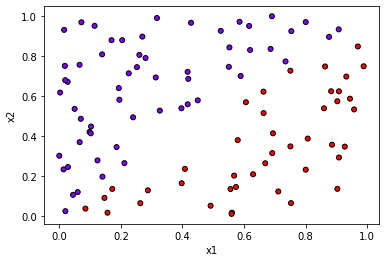

In [4]:
# seed값을 부여한 난수 생성 object 선언 및 데이터 생성
rng = np.random.RandomState(1) 
X = np.array(rng.rand(100,2))
Y = (np.sign(X[:,0]-X[:,1])+1)/2

# 학습 데이터 scatter plot으로 나타내기
plt.figure( )
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 25, cmap = 'rainbow', edgecolor = 'k',
               clim = (Y.min(), Y.max()), zorder = 3)
plt.xlabel('x1')
plt.ylabel('x2')

**1. 결정 트리를 이용한 분류**

결정 트리 모델을 생성하고 학습한 후, 앞서 선언한 함수를 이용해 결정경계를 시각화한다.


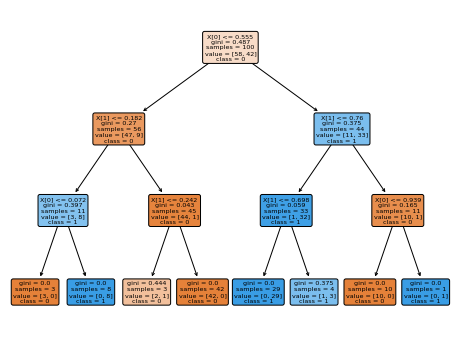

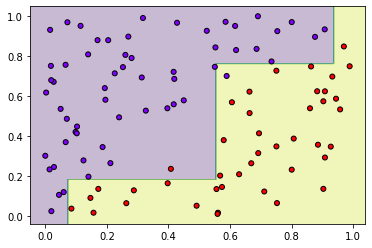

In [5]:
# 모델 생성 및 학습
model = DecisionTreeClassifier(random_state = 42, max_depth = 3)
model.fit(X, Y)

# 결정 트리 시각화
plt.figure(figsize=(8,6))
tree.plot_tree(model, filled=True,
               class_names=['0','1'],
#               feature_names=iris.feature_names,
#               impurity=True, filled=True,
               rounded=True)

# 데이터 및 결정경계 시각화
visualize_boundary(model, X, Y)

**2. 랜덤 포레스트를 이용한 분류**

랜덤 포레스트를 통해 앞서 결정 트리로 얻은 결정경계에 비해 더 정교한 결정경계를 얻는다. 



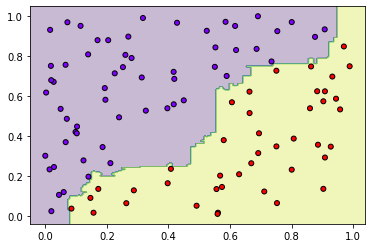

In [6]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 학습. n_estimators는 모델에서 사용할 트리의 개수이다.
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X, Y)

visualize_boundary(model, X, Y)

**3. 결정 트리를 이용한 회귀**

트리의 깊이(max_depth)에 따라 변화하는 회귀함수의 형태를 확인해 본다.

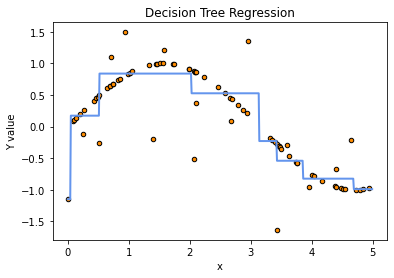

In [7]:
# 데이터 생성
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis = 0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# 모델 선언 및 학습
regtree = DecisionTreeRegressor(max_depth = 3) # max_depth값 조정하여 회귀함수 형태 확인해 보기
regtree.fit(X, y)

# 회귀함수를 그리기 위한 테스트 데이터 생성 및 예측
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] # 0부터 0.01씩 5까지 증가
y_hat = regtree.predict(X_test)

# 결과 plot
plt.figure( )
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="predict")
plt.xlabel("x")
plt.ylabel("Y value")
plt.title("Decision Tree Regression")
plt.show()



[Text(0.5, 0.875, 'X[0] <= 3.133\nsquared_error = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(0.25, 0.625, 'X[0] <= 0.514\nsquared_error = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(0.125, 0.375, 'X[0] <= 0.046\nsquared_error = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = -1.149'),
 Text(0.1875, 0.125, 'squared_error = 0.052\nsamples = 10\nvalue = 0.173'),
 Text(0.375, 0.375, 'X[0] <= 2.029\nsquared_error = 0.148\nsamples = 40\nvalue = 0.714'),
 Text(0.3125, 0.125, 'squared_error = 0.093\nsamples = 24\nvalue = 0.839'),
 Text(0.4375, 0.125, 'squared_error = 0.172\nsamples = 16\nvalue = 0.527'),
 Text(0.75, 0.625, 'X[0] <= 3.85\nsquared_error = 0.124\nsamples = 29\nvalue = -0.667'),
 Text(0.625, 0.375, 'X[0] <= 3.429\nsquared_error = 0.124\nsamples = 14\nvalue = -0.452'),
 Text(0.5625, 0.125, 'squared_error = 0.002\nsamples = 4\nvalue = -0.229'),
 Text(0.6875, 0.125, 'squared_error = 0.145\nsamples = 10\nvalue = -0.541'),
 Text(0.

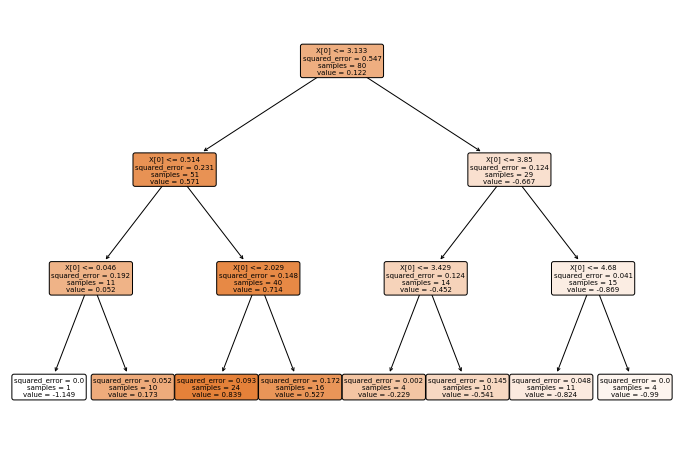

In [8]:
# 결정트리 시각화
plt.figure(figsize=(12,8) )
tree.plot_tree(regtree, filled=True, rounded=True)

**4. 랜덤 포레스트를 이용한 회귀**

랜덤 포레스트를 이용한 회귀함수가 결정 트리를 통해 얻은 결정경계에 비해 정교함을 확인할 수 있다.

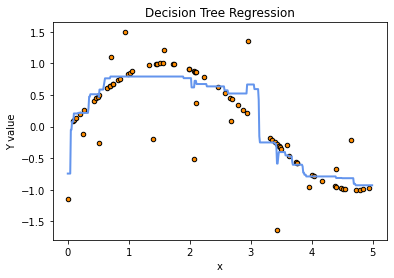

In [9]:
regr = RandomForestRegressor(max_depth=3, #random_state=531,
                             n_estimators=10)
regr.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regr.predict(X_test)

# Plot the results
plt.figure( )
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="predict")
plt.xlabel("x")
plt.ylabel("Y value")
plt.title("Decision Tree Regression")
plt.show()